In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Player Performance Analysis. Dataset:La Liga.
This notebook is divided into 3 sections - Part I: Shooting Game, Part II: Passing Game Part II: Defensive Game.
Based on this article:https://www.sportperformanceanalysis.com/article/performance-indicators-in-football

In [210]:
df= pd.read_csv('laliga.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

# Find the number of players in each position

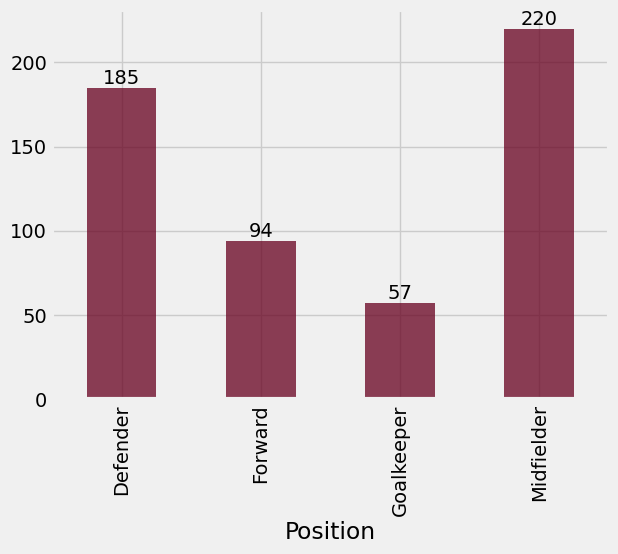

In [256]:
ax=df.groupby('Position')['Position'].value_counts().plot(kind='bar', cmap='RdGy', alpha=0.75)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Part I: Shooting Game

<Figure size 1200x300 with 0 Axes>

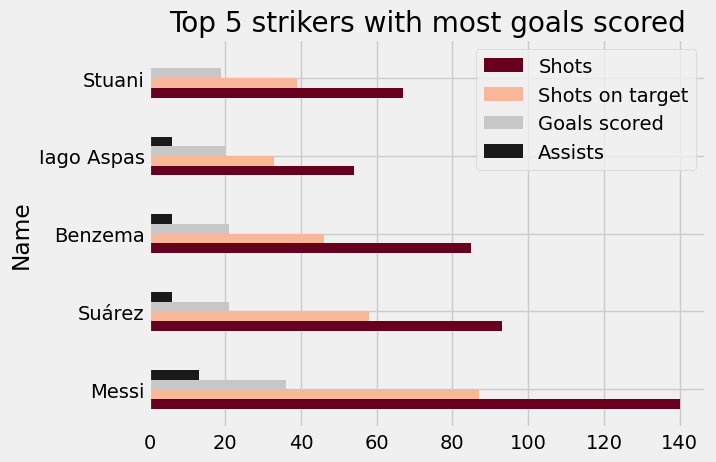

In [269]:
#Selecting the columns we need
plt.figure(figsize=(12,3))
cols=['Team','Name','Shots','Shots on target','Goals scored','Assists']
df_f = df[cols]
#Group by player names and find the best striker
gbo=df_f.groupby(by='Name')
gbo.sum('Goals scored').sort_values('Goals scored',ascending=False).head().plot(kind='barh', cmap='RdGy')
plt.title('Top 5 strikers with most goals scored')
plt.show()

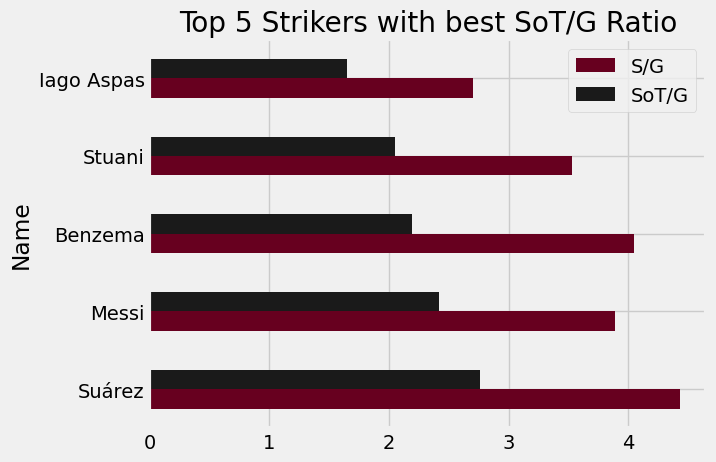

In [271]:
#Shots to goal ratio & Shots on target to goal ratio
df_f5=gbo.sum('Goals scored').sort_values('Goals scored',ascending=False).head()
df_f5['S/G'] =  df_f5['Shots']/df_f5['Goals scored']
df_f5['SoT/G'] =  df_f5['Shots on target']/df_f5['Goals scored']
df_f5[['S/G','SoT/G']].sort_values('SoT/G',ascending=False).plot(kind='barh', cmap='RdGy')
plt.title('Top 5 Strikers with best SoT/G Ratio')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Part II: Passing Game

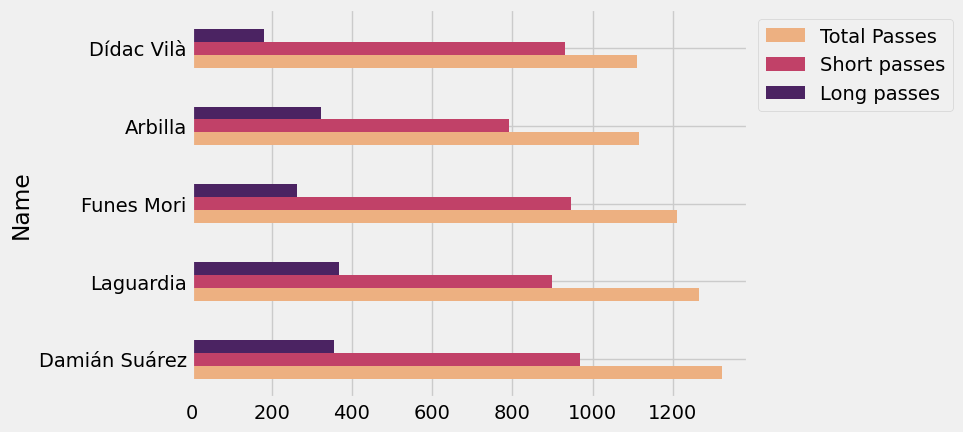

In [251]:
#Total number of passes, short passes, long passes
df['Total Passes'] = (df['Short passes']+df['Long passes'])
df_p=df[['Name','Total Passes','Short passes','Long passes']]
df_p.set_index('Name', inplace=True)
df_p.sort_values('Total Passes', ascending=False).head().plot(kind='barh', cmap='flare')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Part III: Defensive Game

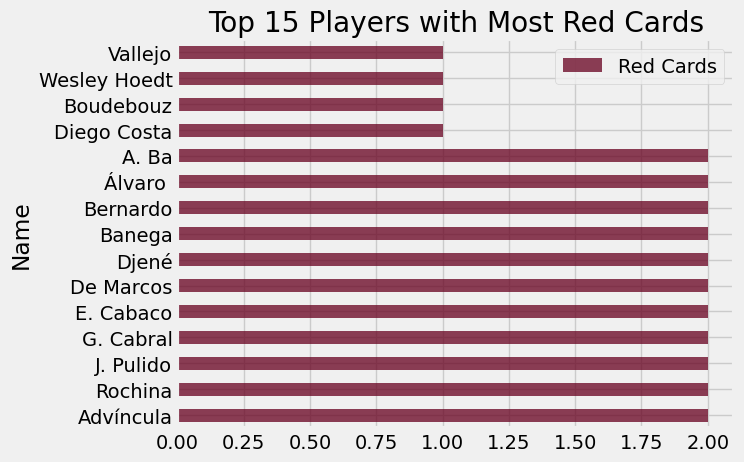

In [273]:
#Which position gets the most red cards? Defenders!
#Players with most red cards
gbo=df.groupby('Name')['Red Cards']
gbo.sum('Red Cards').sort_values(ascending=False).head(15).plot(kind='barh',cmap='RdGy', alpha=0.75)
plt.title('Top 15 Players with Most Red Cards')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

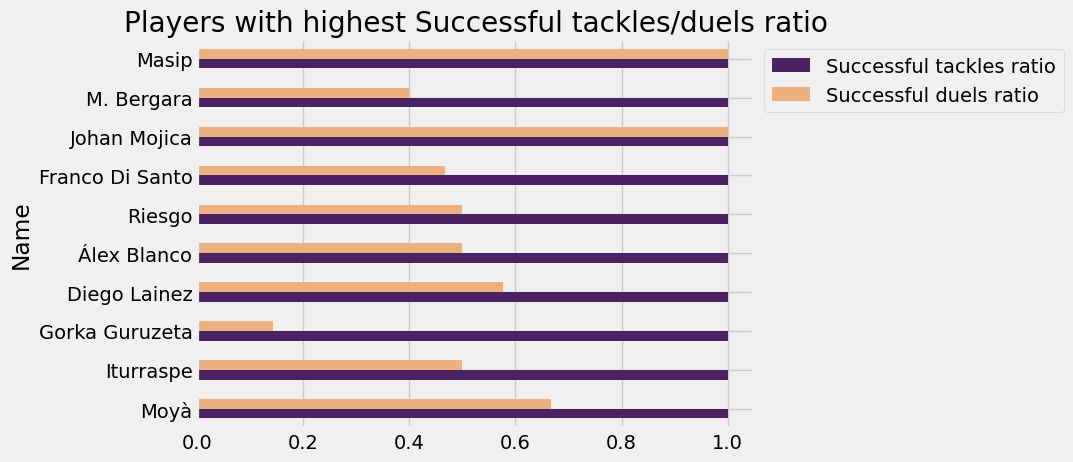

In [250]:
#Total number of successful tackles or duels/Total number tackles or duels (successful + unsuccessful)
df['Successful tackles ratio'] = (df['Successful tackles']/(df['Successful tackles']+df['Unssuccessful tackles']))
df['Successful duels ratio'] = (df['Successful duels']/(df['Successful duels']+df['Duels lost']))

df_t=df[['Name','Successful tackles ratio','Successful duels ratio']]
df_t.set_index('Name', inplace=True)
df_t.sort_values('Successful tackles ratio',ascending=False).head(10).plot(kind='barh',cmap='flare_r')
plt.title('Players with highest Successful tackles/duels ratio')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

C:\Users\neogi\AppData\Local\Temp\ipykernel_5508\3673553196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cir['Total CIR'] = df_cir.sum(axis=1)


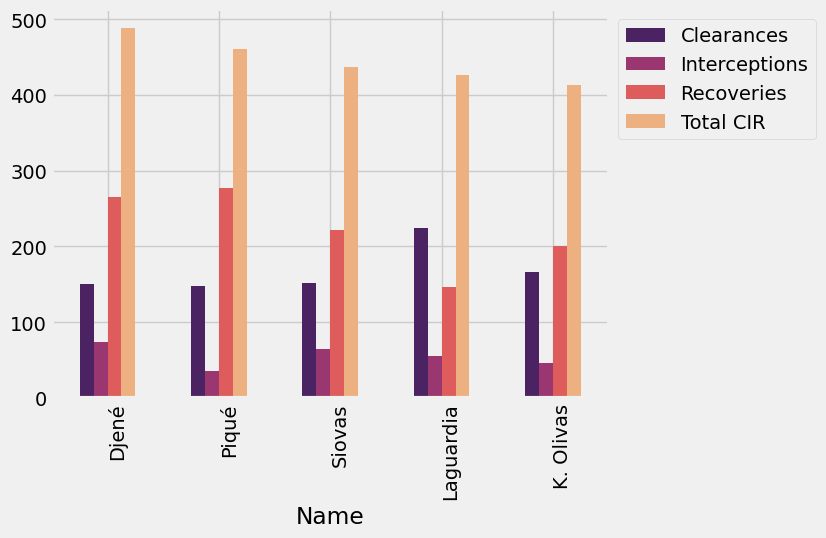

In [249]:
#Players with high clearances,interceptions,and recoveries (CIR)
df_cir = df[['Name','Clearances','Interceptions','Recoveries']]
df_cir.set_index('Name', inplace=True)
df_cir['Total CIR'] = df_cir.sum(axis=1)
df_cir.sort_values('Total CIR',ascending=False).head().plot(kind='bar',cmap='flare_r')
plt.xticks(rotation=90, ha='left')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Conclusion
For attacking positions, I'd pick Suarez, Messi and Benzema. For defensive & midfielding positions, I'd pick Masip, Johan Mojica & Moya and Funes Mori, Pique, Siovas, Laguardia & K. Olivas. I wouldn't pick Djene for defense, because his name occurs in the list of players with highest number of Red Cards. 